## Working notebook for Python data analysis project

In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
import plotly
plotly.offline.init_notebook_mode(connected = True)
from plotly.graph_objs import Figure, Histogram, Layout, Scatter

In [3]:
surveys_dtypes = {'Facility ID':'string',
 'Facility Name':'string',
 'Address':'string',
 'City':'string',
 'State':'string',
 'ZIP Code':'string',
 'County Name':'string',
 'Phone Number':'string',
 'HCAHPS Measure ID':'string',
 'HCAHPS Question':'string',
 'HCAHPS Answer Description':'string',
 'Patient Survey Star Rating':'Int32',
 'Patient Survey Star Rating Footnote':'string',
 'HCAHPS Answer Percent':'Int32',
 'HCAHPS Answer Percent Footnote':'string',
 'HCAHPS Linear Mean Value':'Int32',
 'Number of Completed Surveys':'Int32',
 'Number of Completed Surveys Footnote':'string',
 'Survey Response Rate Percent':'Int32',
 'Survey Response Rate Percent Footnote':'string',
 'Start Date':'string',
 'End Date':'string'}

In [4]:
surveys = pd.read_csv('HCAHPS-Hospital.csv', low_memory = False, 
                      dtype = surveys_dtypes, na_values = ['Not Available', 'Not Applicable'])

In [5]:
unpland_dtypes = {'Facility ID':'string',
 'Facility Name':'string',
 'Address':'string',
 'City':'string',
 'State':'string',
 'ZIP Code':'string',
 'County Name':'string',
 'Phone Number':'string',
 'Measure ID':'string',
 'Measure Name':'string',
 'Compared to National':'string',
 'Denominator':'float',
 'Score':'float',
 'Lower Estimate':'float',
 'Higher Estimate':'float',
 'Number of Patients':'Int32',
 'Number of Patients Returned':'Int32',
 'Footnote':'string',
 'Start Date':'string',
 'End Date':'string'}

In [6]:
unpland = pd.read_csv('Unplanned_Hospital_Visits-Hospital.csv', 
                      low_memory = False, 
                      dtype = unpland_dtypes, na_values = ['Not Available', 'Not Applicable'])

In [7]:
print(surveys.shape)
print(surveys['Facility ID'].unique().size)
print(surveys['Start Date'].unique().size)
print(surveys['End Date'].unique().size)
print(surveys['Start Date'].unique()[0])
print(surveys['End Date'].unique()[0])

(452538, 22)
4866
1
1
01/01/2019
12/31/2019


In [8]:
print(unpland.shape)
print(unpland['Facility ID'].unique().size)
print(unpland['Start Date'].unique().size)
print(unpland['End Date'].unique().size)
print(list(unpland['Start Date'].unique()))
print(list(unpland['End Date'].unique()))

(68124, 20)
4866
4
2
['07/01/2017', '01/01/2017', '01/01/2019', '07/01/2019']
['12/01/2019', '12/24/2019']


#### Note that the survey data is for 2019 only, whereas the unplanned visits data can span periods beginning in 2017. It is impossible (or at least problematic) to extract only 2019 data from unplanned visits because a single measure (single row) can have a start date in 2017 and an end date in 2019. We will continue with the analysis but this is certainly an issue to be aware of and communicated along with the results.

In [9]:
list(enumerate(surveys.columns.tolist()))

[(0, 'Facility ID'),
 (1, 'Facility Name'),
 (2, 'Address'),
 (3, 'City'),
 (4, 'State'),
 (5, 'ZIP Code'),
 (6, 'County Name'),
 (7, 'Phone Number'),
 (8, 'HCAHPS Measure ID'),
 (9, 'HCAHPS Question'),
 (10, 'HCAHPS Answer Description'),
 (11, 'Patient Survey Star Rating'),
 (12, 'Patient Survey Star Rating Footnote'),
 (13, 'HCAHPS Answer Percent'),
 (14, 'HCAHPS Answer Percent Footnote'),
 (15, 'HCAHPS Linear Mean Value'),
 (16, 'Number of Completed Surveys'),
 (17, 'Number of Completed Surveys Footnote'),
 (18, 'Survey Response Rate Percent'),
 (19, 'Survey Response Rate Percent Footnote'),
 (20, 'Start Date'),
 (21, 'End Date')]

#### For the most part footnotes explain why a value is missing, or give information on a restriction that applies to a measure. At this time they are deemed unimportant. 

In [10]:
star_ratings = surveys.iloc[:, [0, 8, 11]][surveys['HCAHPS Measure ID'].apply(lambda x: re.search('STAR_RATING$', x) != None)]
star_ratings['HCAHPS Measure ID'] = star_ratings['HCAHPS Measure ID'].apply(lambda x: x[:-12])

In [11]:
linear_scores = surveys.iloc[:, [0, 8, 15]][surveys['HCAHPS Measure ID'].apply(lambda x: re.search('LINEAR_SCORE$', x) != None)]
linear_scores['HCAHPS Measure ID'] = linear_scores['HCAHPS Measure ID'].apply(lambda x: x[:-13])

In [12]:
star_linear = pd.merge(star_ratings, linear_scores, on=['Facility ID','HCAHPS Measure ID'])

In [13]:
sl_dropna = star_linear.dropna()
data_fig1 = [Scatter(x = sl_dropna['Patient Survey Star Rating'], y = sl_dropna['HCAHPS Linear Mean Value'], mode = 'markers')]
layout_fig1 = Layout(title = 'Star rating vs linear score (all hospitals, all measures)', title_font_size = 21, title_x = 0.5) 
fig1 = Figure(data = data_fig1, layout = layout_fig1)
fig1.update_xaxes(title='Patient Survey Star Rating')
fig1.update_yaxes(title='HCAHPS Linear Mean Value')
plotly.offline.iplot(fig1, show_link = False)

#### Because of the increased amount of information available we will concentrate on linear scores, except possibly in the case where there is a star rating but no linear score for a measure. There is a case to be made for star ratings, but this can be investigated at a future date.

In [14]:
list(enumerate(unpland.columns.tolist()))

[(0, 'Facility ID'),
 (1, 'Facility Name'),
 (2, 'Address'),
 (3, 'City'),
 (4, 'State'),
 (5, 'ZIP Code'),
 (6, 'County Name'),
 (7, 'Phone Number'),
 (8, 'Measure ID'),
 (9, 'Measure Name'),
 (10, 'Compared to National'),
 (11, 'Denominator'),
 (12, 'Score'),
 (13, 'Lower Estimate'),
 (14, 'Higher Estimate'),
 (15, 'Number of Patients'),
 (16, 'Number of Patients Returned'),
 (17, 'Footnote'),
 (18, 'Start Date'),
 (19, 'End Date')]

In [15]:
print(list(unpland[unpland['Measure ID']=='READM_30_HOSP_WIDE']['Start Date'].unique()))
print(list(unpland[unpland['Measure ID']=='READM_30_HOSP_WIDE']['End Date'].unique()))

['07/01/2019']
['12/01/2019']


#### It seems by focussing on the measure 'READM_30_HOSP_WIDE' we eliminate the previous concern over dates, though they still do not match precisely so can be considered to only modify the issue. 

In [16]:
readm_hw = unpland[unpland['Measure ID']=='READM_30_HOSP_WIDE'].iloc[:, [0, 12]].dropna()
readm_hw = readm_hw.rename(columns={'Score':'READM_RATE'}).set_index('Facility ID')

In [17]:
readm_hw.shape

(4131, 1)

In [18]:
linear_scores = linear_scores.set_index(['Facility ID', 'HCAHPS Measure ID'])
linear_pv = linear_scores.unstack().droplevel(0, axis = 1)
linear_pv

HCAHPS Measure ID,H_CLEAN,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_5,H_COMP_6,H_COMP_7,H_HSP_RATING,H_QUIET,H_RECMND
Facility ID,,,,,,,,,,
010001,87,90,91,84,80,90,82,88,86,90
010005,85,91,93,83,80,90,81,88,85,88
010006,86,90,92,78,76,84,80,86,87,87
010007,88,91,92,86,83,90,83,88,88,88
010008,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...
670260,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
670266,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
670267,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [41]:
linear_pv.dropna().shape

(3445, 10)

In [19]:
lin_readm = pd.merge(linear_pv, readm_hw, on='Facility ID')
lin_readm

,H_CLEAN,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_5,H_COMP_6,H_COMP_7,H_HSP_RATING,H_QUIET,H_RECMND,READM_RATE
Facility ID,,,,,,,,,,,
010001,87,90,91,84,80,90,82,88,86,90,15.5
010005,85,91,93,83,80,90,81,88,85,88,14.7
010006,86,90,92,78,76,84,80,86,87,87,15.7
010007,88,91,92,86,83,90,83,88,88,88,15.7
010008,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,15.3
...,...,...,...,...,...,...,...,...,...,...,...
670116,93,95,94,92,86,91,86,93,92,94,15.9
670120,89,89,89,83,78,84,80,87,85,87,16.5
670122,86,91,91,85,77,86,82,92,84,92,16.9


In [20]:
readm_corr = lin_readm.corr()[:-1]['READM_RATE'].sort_values()
readm_corr

H_COMP_6       -0.262240
H_RECMND       -0.232840
H_COMP_1       -0.226153
H_HSP_RATING   -0.225432
H_COMP_3       -0.212882
H_COMP_7       -0.203613
H_COMP_2       -0.197653
H_CLEAN        -0.193883
H_COMP_5       -0.167898
H_QUIET        -0.157066
Name: READM_RATE, dtype: float64

In [21]:
X_ = np.array(lin_readm[['H_COMP_6', 'READM_RATE']].dropna()['H_COMP_6']).astype('float')
X = X_.reshape(-1,1)
y = np.array(lin_readm[['H_COMP_6', 'READM_RATE']].dropna()['READM_RATE']).astype('float')
reg_COMP_6 = LinearRegression().fit(X, y)

In [22]:
print(reg_COMP_6.coef_)
print(reg_COMP_6.intercept_)
print(reg_COMP_6.score(X, y))

[-0.05266592]
20.08421333096387
0.06876971883776373


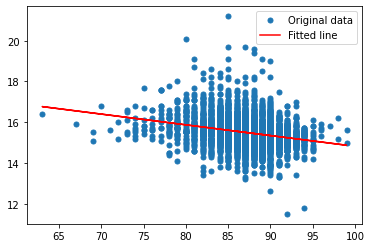

In [23]:
m = reg_COMP_6.coef_[0]
b = reg_COMP_6.intercept_

_ = plt.plot(X_, y, 'o', label='Original data', markersize=5)
_ = plt.plot(X_, m*X_ + b, 'r', label='Fitted line')
_ = plt.legend()
plt.show()

In [24]:
X2 = sm.add_constant(X_)
model = sm.OLS(y, X2)
reg2_COMP_6 = model.fit()

In [25]:
print(reg2_COMP_6.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     249.8
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           2.47e-54
Time:                        09:32:04   Log-Likelihood:                -3652.0
No. Observations:                3384   AIC:                             7308.
Df Residuals:                    3382   BIC:                             7320.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0842      0.290     69.149      0.0

In [27]:
list(enumerate(lin_readm.columns.tolist()))

[(0, 'H_CLEAN'),
 (1, 'H_COMP_1'),
 (2, 'H_COMP_2'),
 (3, 'H_COMP_3'),
 (4, 'H_COMP_5'),
 (5, 'H_COMP_6'),
 (6, 'H_COMP_7'),
 (7, 'H_HSP_RATING'),
 (8, 'H_QUIET'),
 (9, 'H_RECMND'),
 (10, 'READM_RATE')]

In [40]:
X_all = np.array(lin_readm.dropna().iloc[:, range(10)]).astype(float)
X_all = sm.add_constant(X_all)
y_all = np.array(lin_readm.dropna()['READM_RATE']).astype(float)
model_all = sm.OLS(y_all, X_all)
reg_all = model_all.fit()
print(reg_all.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     33.81
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           2.58e-63
Time:                        09:50:00   Log-Likelihood:                -3610.9
No. Observations:                3384   AIC:                             7244.
Df Residuals:                    3373   BIC:                             7311.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.6760      0.617     33.484      0.0

Predictor variable dictionary: {
'x1':'H_CLEAN', 
'x2':'H_COMP_1', 
'x3:'H_COMP_2', 
'x4':'H_COMP_3', 
'x5':'H_COMP_5', 
'x6':'H_COMP_6', 
'x7':'H_COMP_7', 
'x8':'H_HSP_RATING', 
'x9':'H_QUIET', 
'x10':'H_RECMND'
}

Measure Id dictionary: {
'H_CLEAN':'Cleanliness'
'H_COMP_1':'Nurse communication', 
'H_COMP_2':'Doctor communication', 
'H_COMP_3':'Staff responsiveness', 
'H_COMP_5':'Communication about medicine', 
'H_COMP_6':'Discharge information', 
'H_COMP_7':'Care transition', 
'H_HSP_RATING':'Overall hospital rating', 
'H_QUIET':'Quietness', 
'H_RECMND':'Recommend hospital'
}